# Case Study 6

Build a dense neural network to accurately detect the particle. The goal is to maximize your accuracy. Include a discussion of how you know your model has finished training as well as what design decisions you made while building the network. ([dataset](https://smu.box.com/s/y2mldr5598giclrr55nuzd5yaey6rhxn)).

In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

2024-04-01 23:04:13.686412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("all_train.csv.gz")
df

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.000000
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.000000
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.000000
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.000000
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.0,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,...,0.664328,-0.960709,-0.894011,1.743123,-0.426198,-0.324286,-0.432739,1.340297,0.267774,750.000000
6999996,0.0,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,...,-1.015462,1.367217,-1.053815,-0.573682,-1.907798,0.194661,-0.190621,0.027776,-0.316018,1250.000000
6999997,1.0,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,...,0.790842,0.892545,-0.192816,-0.573682,0.973622,1.034964,-0.340661,-0.181193,1.877042,1500.000000
6999998,1.0,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,...,-0.671423,-0.308908,-0.568336,-0.573682,1.043119,1.270350,0.217405,0.120213,1.073020,1500.000000


In [3]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


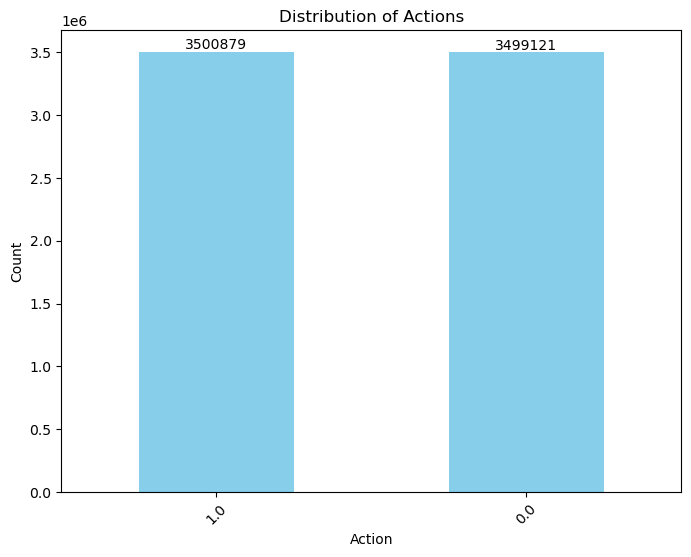

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
ax = df['# label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Actions')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value counts to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [3]:
X = df.drop(df.columns[0], axis=1) 
y = df.iloc[:, 0].values 
X
y

array([1., 1., 0., ..., 1., 1., 1.])

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns = X.columns.values)
df_scaled

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,0.254650,0.588009,0.788389,0.740048,0.623429,0.189321,0.743823,0.562388,0.952320,1.0,...,0.768115,0.558643,0.609172,1.0,0.644207,0.645678,0.569167,0.524936,0.686754,0.50
1,0.578779,0.432491,0.141518,0.643605,0.248326,0.189321,0.449102,0.311728,0.689445,1.0,...,0.072438,0.307730,0.071580,0.0,0.177375,0.297553,0.570668,0.319554,0.344720,0.25
2,0.252390,0.879274,0.576384,0.672976,0.415631,0.000000,0.278942,0.757963,0.866808,1.0,...,0.069624,0.618062,0.040736,0.0,0.282651,0.269650,0.570633,0.335554,0.159161,0.25
3,0.249673,0.478037,0.312518,0.555995,0.025501,0.189321,0.598937,0.311344,0.343659,1.0,...,0.288630,0.498519,0.814225,0.0,0.307117,0.307209,0.569241,0.360313,0.446836,0.75
4,0.298653,0.365404,0.320966,0.701976,0.958644,0.189321,0.361130,0.275334,0.597378,0.0,...,0.154773,0.189167,0.337358,1.0,0.413126,0.336491,0.622898,0.378224,0.227324,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.564428,0.386474,0.131706,0.752467,0.063657,0.344007,0.537544,0.490021,0.710549,1.0,...,0.315039,0.289468,0.241809,1.0,0.293401,0.313252,0.566916,0.549022,0.409828,0.25
6999996,0.228621,0.557278,0.524790,0.689147,0.201053,0.189321,0.430424,0.630711,0.905604,0.0,...,0.093858,0.799522,0.195683,0.0,0.157785,0.350154,0.573714,0.398675,0.327341,0.75
6999997,0.319137,0.291325,0.664687,0.813790,0.684644,0.000000,0.614352,0.728691,0.208745,1.0,...,0.331697,0.695520,0.444203,0.0,0.421530,0.409908,0.569501,0.374738,0.637207,1.00
6999998,0.571033,0.731735,0.662423,0.821576,0.721504,0.000000,0.609135,0.528119,0.092428,0.0,...,0.139159,0.432279,0.335812,0.0,0.427892,0.426646,0.585171,0.409263,0.523604,1.00


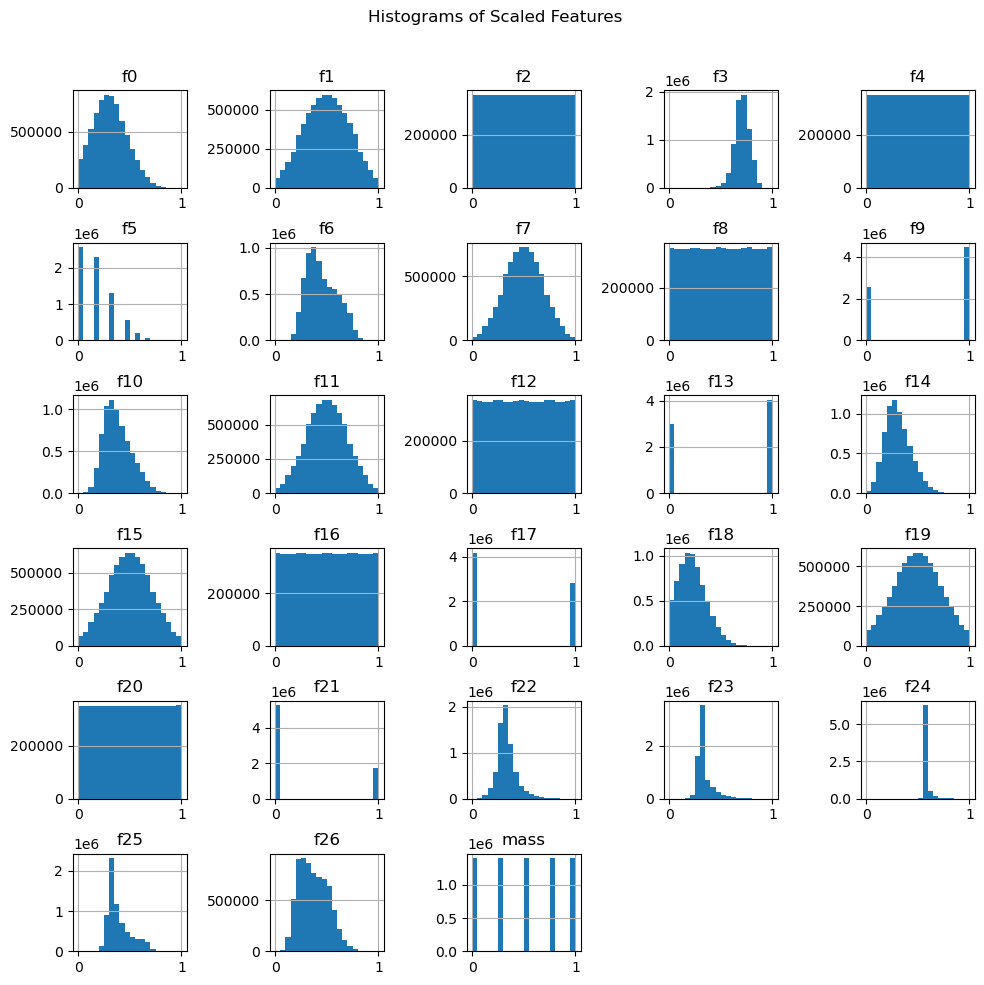

In [10]:
histograms = df_scaled.hist(figsize=(10, 10), bins=20)  # Adjust figsize and bins as needed
plt.tight_layout()  # Adjust layout
plt.suptitle('Histograms of Scaled Features')  # Add a title to the entire grid
plt.subplots_adjust(top=0.9)
plt.show()

In [21]:
missing_values = df.isna().sum()

# Filter features with missing values
missing_values_table = missing_values[missing_values > 0]

# Create a DataFrame from the filtered missing values
na_df = pd.DataFrame(missing_values_table, columns=['Missing Values'])

missing_values

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### MODEL 1

In [6]:
my_model = tf.keras.Sequential()

In [13]:
X_scaled.shape

(7000000, 28)

In [6]:
my_model.add(tf.keras.Input(shape=(28,)))
my_model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
my_model.add(tf.keras.layers.Dense(50, activation='sigmoid'))
my_model.add(tf.keras.layers.Dense(1, activation='linear'))

my_model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

NameError: name 'my_model' is not defined

In [8]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2900      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import History, CSVLogger
import time


In [11]:
# Callbacks
history_callback = History()
csv_logger = CSVLogger('training.log')

In [12]:
start_time = time.time()
history = my_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[history_callback, csv_logger])
end_time = time.time()

# Print/log the results
print("Time taken for each epoch:")
for epoch, time_taken in enumerate(history.history['val_loss']):
    print(f"Epoch {epoch+1}: {time_taken:.2f} seconds")

print("\nFinal results:")
loss, mse, mae = my_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Mean Squared Error: {mse:.4f}")
print(f"Test Mean Absolute Error: {mae:.4f}")
print(f"Total Training Time: {end_time - start_time:.2f} seconds")

Epoch 1/10
175000/175000 [==============================] - 497s 3ms/step - loss: 0.1295 - mean_squared_error: 0.1295 - mean_absolute_error: 0.2934 - val_loss: 0.1237 - val_mean_squared_error: 0.1237 - val_mean_absolute_error: 0.2832
Epoch 2/10
175000/175000 [==============================] - 440s 3ms/step - loss: 0.1245 - mean_squared_error: 0.1245 - mean_absolute_error: 0.2837 - val_loss: 0.1237 - val_mean_squared_error: 0.1237 - val_mean_absolute_error: 0.2814
Epoch 3/10
175000/175000 [==============================] - 429s 2ms/step - loss: 0.1231 - mean_squared_error: 0.1231 - mean_absolute_error: 0.2807 - val_loss: 0.1210 - val_mean_squared_error: 0.1210 - val_mean_absolute_error: 0.2759
Epoch 4/10
175000/175000 [==============================] - 2037s 12ms/step - loss: 0.1191 - mean_squared_error: 0.1191 - mean_absolute_error: 0.2701 - val_loss: 0.1159 - val_mean_squared_error: 0.1159 - val_mean_absolute_error: 0.2626
Epoch 5/10
175000/175000 [==============================] - 56

In [26]:
history_callback[

In [18]:
predictions = my_model.predict(X_test)

43750/43750 [==============================] - 101s 2ms/step


In [19]:
test_accuracy = tf.keras.metrics.Accuracy()

test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

In [33]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2900      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### MODEL 2

In [9]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Dense(100, activation='tanh',kernel_initializer='zeros'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(3 ,activation='softmax'))

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (100, 100)                2900      
                                                                 
 dropout_1 (Dropout)         (100, 100)                0         
                                                                 
 dense_3 (Dense)             (100, 3)                  303       
                                                                 
Total params: 3203 (12.51 KB)
Trainable params: 3203 (12.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs/name")
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
tb = TensorBoard(log_dir=f"logs/model2")
es = EarlyStopping(patience=5, monitor='val_loss')
model2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5, batch_size=100, callbacks=[es,tb])

Epoch 1/5
56000/56000 [==============================] - 312s 6ms/step - loss: 0.3632 - accuracy: 0.8359 - val_loss: 0.3398 - val_accuracy: 0.8467
Epoch 2/5
56000/56000 [==============================] - 303s 5ms/step - loss: 0.3455 - accuracy: 0.8395 - val_loss: 0.3277 - val_accuracy: 0.8457
Epoch 3/5
56000/56000 [==============================] - 313s 6ms/step - loss: 0.3373 - accuracy: 0.8421 - val_loss: 0.3212 - val_accuracy: 0.8512
Epoch 4/5
56000/56000 [==============================] - 314s 6ms/step - loss: 0.3322 - accuracy: 0.8439 - val_loss: 0.3174 - val_accuracy: 0.8539
Epoch 5/5
56000/56000 [==============================] - 318s 6ms/step - loss: 0.3291 - accuracy: 0.8452 - val_loss: 0.3164 - val_accuracy: 0.8511


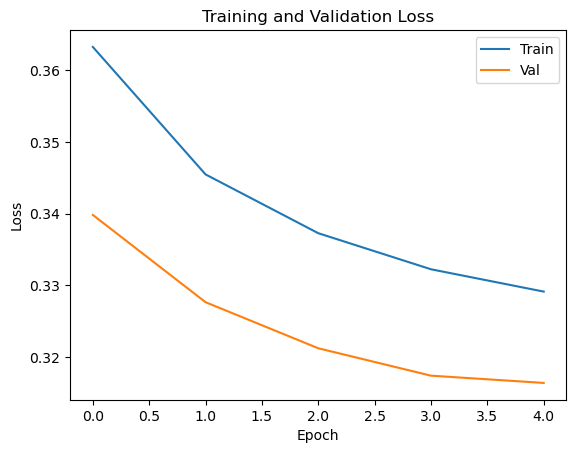

In [14]:
train_loss = model2.history.history['loss']
val_loss = model2.history.history['val_loss']
plt.plot(train_loss,label='Train')
plt.plot(val_loss,label='Val')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

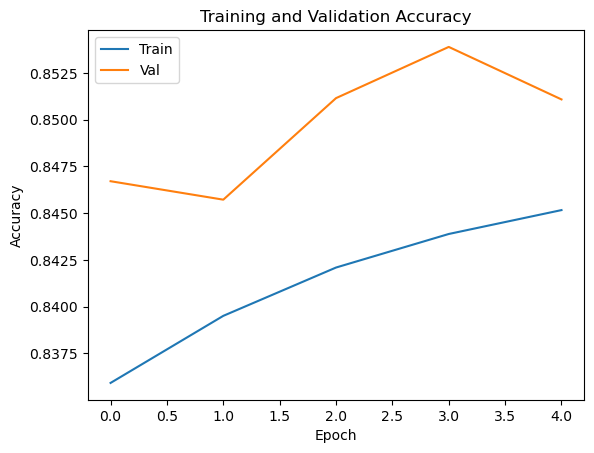

In [16]:
train_acc = model2.history.history['accuracy']
val_acc = model2.history.history['val_accuracy']
plt.plot(train_acc,label='Train')
plt.plot(val_acc,label='Val')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
predictions2 = model2.predict(X_test)
predictions_classes = np.argmax(predictions2, axis=1)  # Convert probabilities to predicted classes
predictions_classes

43750/43750 [==============================] - 132s 3ms/step


array([0, 0, 0, ..., 1, 1, 1])

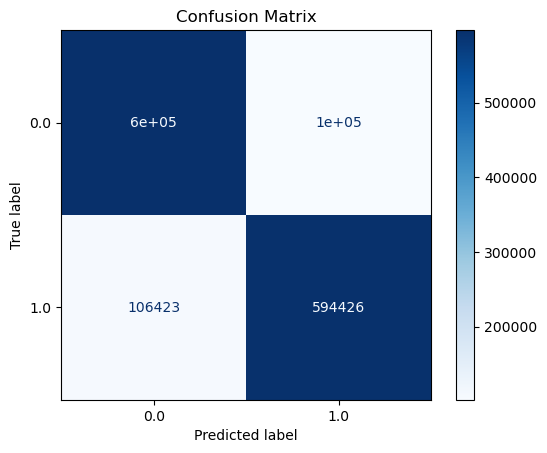

In [30]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# Create a confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, predictions_classes)

cm = confusion_matrix(y_test, predictions_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()